# HEART DISEASE PREDICTION

In [29]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('C:/Users/chandu/Downloads/framingham.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import countplot
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv("C:/Users/chandu/Downloads/framingham.csv")

In [32]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [33]:
#Cleaning the data
df1 = df.drop('education', axis=1)

In [34]:
df1.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [35]:
# replacing 'true' in place of null value
df1.dropna(inplace=True)

In [36]:
df1.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [37]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [38]:
import plotly.subplots as sp
import plotly.graph_objs as go
import pandas as pd

# Assuming df is your DataFrame and num_col is a list of column names

cat_columns = ['male','currentSmoker', 'BPMeds',
               'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']

num_col=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

fig = sp.make_subplots(rows=2, cols=4, subplot_titles=num_col)

for i in range(2):
    for x in range(4):
        if i == 1:
            hist_data = df[num_col[x+4]].value_counts().sort_index()
            trace = go.Bar(x=hist_data.index, y=hist_data.values, name=num_col[x+4])
        else:
            hist_data = df[num_col[x]].value_counts().sort_index()
            trace = go.Bar(x=hist_data.index, y=hist_data.values, name=num_col[x])
        fig.add_trace(trace, row=i+1, col=x+1)

fig.update_layout(
    title="Histogram Subplots",
    showlegend=True,
    autosize=False,
    width=1000,
    height=500,
)

fig.show()


In [39]:
import plotly.express as px

for i in cat_columns:
    if i == "TenYearCHD":
        break
    
    fig = px.histogram(df, x=i, color="TenYearCHD", title=f'Count Plot of {i} vs. TenYearCHD', barmode='group')
    fig.update_layout(
        xaxis_title=i,
        yaxis_title="Count",
    )
    fig.show()


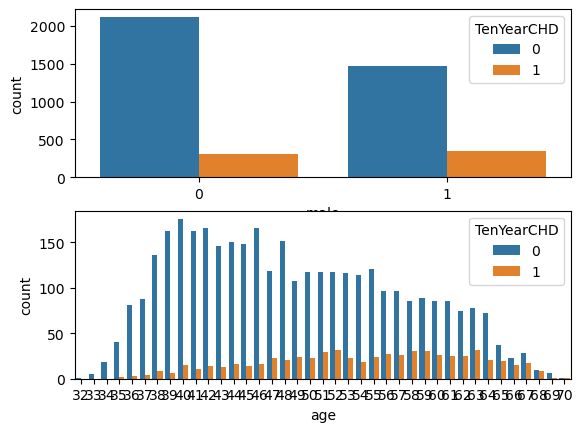

In [40]:
fig, ax = plt.subplots(2)
sns.countplot(x='male',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='age',hue='TenYearCHD', data=df, ax=ax[1])
plt.show()


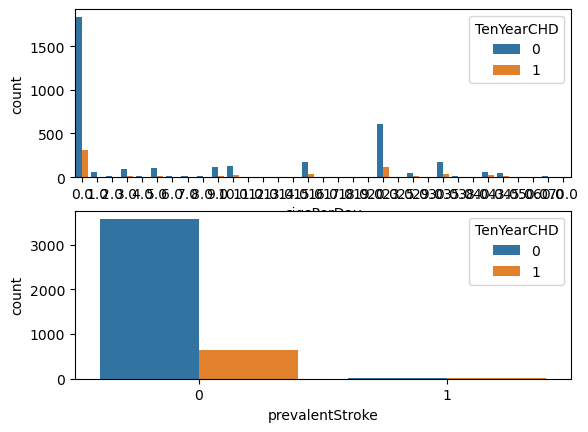

In [41]:
fig, ax = plt.subplots(2)
sns.countplot(x='cigsPerDay',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='prevalentStroke',hue='TenYearCHD', data=df, ax=ax[1])
plt.show()

In [42]:
#Defining x(features) and y(label)
X = df1[["male","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
y = df1[["TenYearCHD"]]

In [43]:
#Before normalization
X.mean()

male                 0.445185
age                 49.578821
currentSmoker        0.488397
cigsPerDay           9.005335
BPMeds               0.030408
prevalentStroke      0.005601
prevalentHyp         0.311816
diabetes             0.027207
totChol            236.952787
sysBP              132.365964
diaBP               82.933716
BMI                 25.809651
heartRate           75.703921
glucose             81.883169
dtype: float64

In [44]:
X.std()

male                0.497053
age                 8.569322
currentSmoker       0.499932
cigsPerDay         11.922440
BPMeds              0.171730
prevalentStroke     0.074643
prevalentHyp        0.463297
diabetes            0.162709
totChol            44.610417
sysBP              22.051951
diaBP              11.933321
BMI                 4.065894
heartRate          11.957763
glucose            23.888039
dtype: float64

In [45]:
#Normalizing dataset
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

In [46]:
#mean after normalizing
X.mean()

-3.9394874081886437e-17

In [47]:
X.std()

1.0

In [48]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [49]:
LR = LogisticRegression().fit(X_train, y_train.values.ravel())

In [50]:
y_pred = LR.predict(X_test)

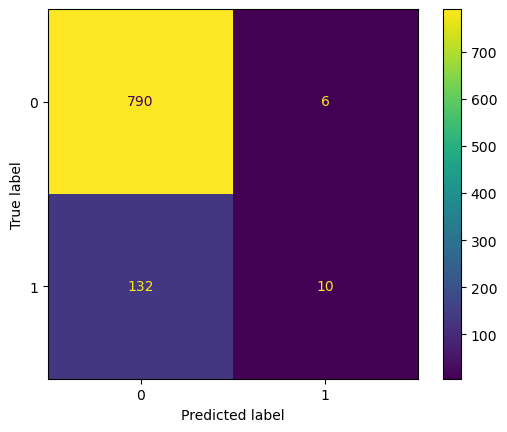

In [51]:
#Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [52]:
accuracy_score(y_test, y_pred)

0.8528784648187633

In [53]:
# checking the probablity of heart disease for test set
y_pred_prob = LR.predict_proba(X_test)

In [54]:
y_pred_prob

array([[0.97453865, 0.02546135],
       [0.77776604, 0.22223396],
       [0.97690372, 0.02309628],
       ...,
       [0.87300827, 0.12699173],
       [0.86259856, 0.13740144],
       [0.93785074, 0.06214926]])

In [55]:
#"Does smoking (cigsPerDay) significantly increase the risk of a heart attack when controlling for other factors?"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import statsmodels.api as sm
df = pd.read_csv('C:/Users/chandu/Downloads/framingham.csv')
data = df[['cigsPerDay', 'TenYearCHD']]
data = data.copy()
data.dropna(inplace=True)

# Define the independent variable (X) and the dependent variable (y)
X = data[['cigsPerDay']]
y = data['TenYearCHD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# Print the summary of the logistic regression model
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(sm.add_constant(X_test))
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.426224
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3367
Model:                          Logit   Df Residuals:                     3365
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:                0.003687
Time:                        14:05:09   Log-Likelihood:                -1435.1
converged:                       True   LL-Null:                       -1440.4
Covariance Type:            nonrobust   LLR p-value:                  0.001118
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8328      0.062    -29.656      0.000      -1.954      -1.712
cigsPerDay     0.0125      0.

In [56]:
#Are medical factors like blood pressure, cholesterol levels, and diabetes independently associated with a higher risk of a heart attack?"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select relevant columns, including blood pressure (sysbp), cholesterol (totchol), and diabetes (diabetes)
data = df[['sysBP', 'totChol', 'diabetes', 'TenYearCHD']]
data = data.copy()
data.dropna(inplace=True)

# Define the independent variables (X) and the dependent variable (y)
X = data[['sysBP', 'totChol', 'diabetes']]
y = data['TenYearCHD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
[[699   6]
 [128   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       705
           1       0.45      0.04      0.07       133

    accuracy                           0.84       838
   macro avg       0.65      0.51      0.49       838
weighted avg       0.78      0.84      0.78       838


Accuracy Score: 0.8400954653937948
